In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
df = pd.read_csv("C:/Users/shrut/Downloads/emails.csv")
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [3]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [12]:
#Model preparation

x = df.drop(columns=["Email No.","Prediction"])
y = df['Prediction']

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2)

In [15]:
#K nearest neighbors

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)
y_predict_knn = knn.predict(xtest)

In [17]:
svm = SVC(kernel='linear',random_state=42)
svm.fit(xtrain,ytrain)
y_predict_svm = svm.predict(xtest)

In [28]:
def evaluate(y_true,y_predict,model_name):
    accuracy = accuracy_score(y_true,y_predict)
    recall = recall_score(y_true,y_predict)
    precision = precision_score(y_true,y_predict)
    cm = confusion_matrix(y_true,y_predict)
    cr = classification_report(y_true,y_predict)
    print("---",model_name,"---")
    print("Accuracy: ",accuracy)
    print("Recall score: ",recall)
    print("Precision score: ",precision)
    print("Confusion Matrix:\n",cm,"\n")
    print("Classification report:\n",cr,"\n")

evaluate(ytest,y_predict_knn,"K Nearest Neighbors")
evaluate(ytest,y_predict_svm,"Support Vector Machine")

--- K Nearest Neighbors ---
Accuracy:  0.8734299516908213
Recall score:  0.8410596026490066
Precision score:  0.7537091988130564
Confusion Matrix:
 [[650  83]
 [ 48 254]] 

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.89      0.91       733
           1       0.75      0.84      0.79       302

    accuracy                           0.87      1035
   macro avg       0.84      0.86      0.85      1035
weighted avg       0.88      0.87      0.88      1035
 

--- Support Vector Machine ---
Accuracy:  0.9584541062801932
Recall score:  0.9370860927152318
Precision score:  0.9218241042345277
Confusion Matrix:
 [[709  24]
 [ 19 283]] 

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       733
           1       0.92      0.94      0.93       302

    accuracy                           0.96      1035
   macro avg       0.95      0.95      0.95      1035
we

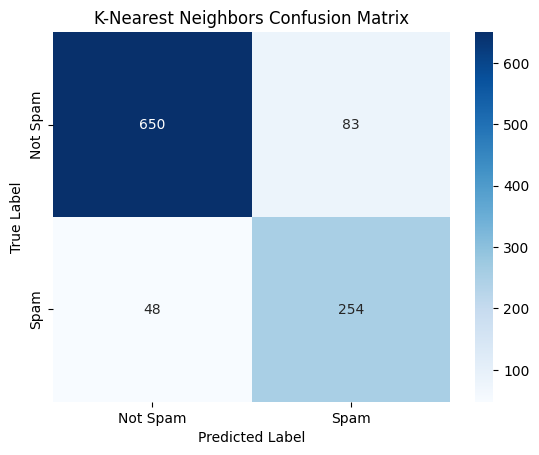

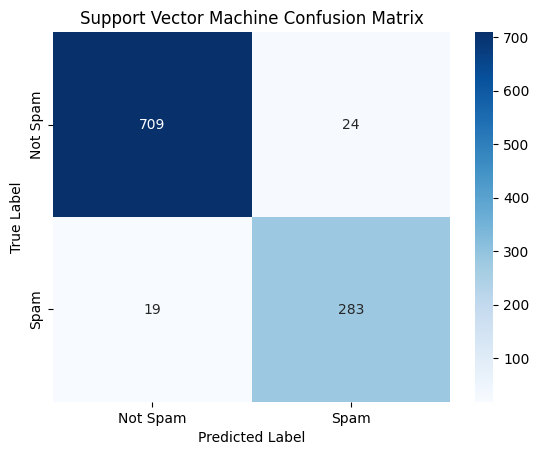

In [30]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
    disp.set_title(f"{model_name} Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

plot_confusion_matrix(ytest, y_predict_knn, "K-Nearest Neighbors")
plot_confusion_matrix(ytest, y_predict_svm, "Support Vector Machine")